In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import cv2,os

data_path='/content/drive/MyDrive/dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'without mask': 0, 'with mask': 1, '.ipynb_checkpoints': 2}
['without mask', 'with mask', '.ipynb_checkpoints']
[0, 1, 2]


In [16]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [17]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [18]:
np.save('/content/drive/MyDrive/data.zip (Unzipped Files)/data',data)
np.save('/content/drive/MyDrive/data.zip (Unzipped Files)/target',new_target)

In [21]:
import numpy as np

data=np.load('/content/drive/MyDrive/data.zip (Unzipped Files)/data.npy')
target=np.load('/content/drive/MyDrive/data.zip (Unzipped Files)/target.npy')

In [22]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [24]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 36s 80ms/step - loss: 0.8200 - accuracy: 0.4775 - val_loss: 0.6746 - val_accuracy: 0.4960
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 1s 46ms/step - loss: 0.6651 - accuracy: 0.5880 - val_loss: 0.6075 - val_accuracy: 0.6250
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 1s 46ms/step - loss: 0.5387 - accuracy: 0.7203 - val_loss: 0.3851 - val_accuracy: 0.8508
INFO:tensorflow:Assets written to: model-003.model/assets
Epoch 4/20
31/31 [==============================] - 1s 46ms/step - loss: 0.3970 - accuracy: 0.8199 - val_loss: 0.3261 - val_accuracy: 0.8306
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 1s 46ms/step - loss: 0.2677 - accuracy: 0.8975 - val_loss: 0.2830 - val_accuracy: 0.8911
INFO:tensorflow:Assets written to: model-005.model/assets
Epoc

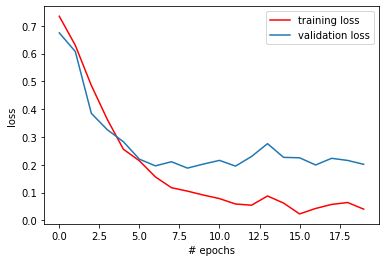

In [25]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

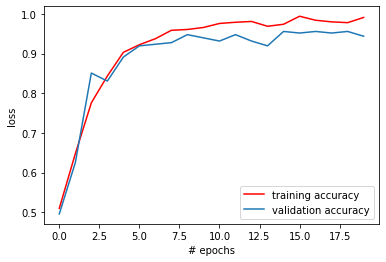

In [26]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 0s 65ms/step - loss: 0.1736 - accuracy: 0.9565
[0.17362749576568604, 0.95652174949646]
